#  Tensorflow 初探

透過實作[keras](https://github.com/shaoeChen/deeplearning/tree/master/keras)的練習，我們已經初步理解神經網路，簡單的應用來說或許是充足，只是如果想要更深入理解神經網路，那就需要讓理論來搭配Tensorflow，自己實作，會更能體會整個神經網路的變化。

Tensorflow=tensor+flow，數據以tensor的形式存在，透過所規劃的graph，由node(節點\_op(註一))flow至下(另)一個node(節點\_op)。

在tensorflow中，即使你已經設置好tensor並且規劃好graph也沒有辦法直接的使用，必需在`Session`的context中去執行，我們透過認識基本函數與小試身手中的範例來理解。

註一：在tensorflow中，節點(node)稱為operator\_簡稱op

## 認識基本函數
我們從宣告變數來做為了解框架的起步

### tf.placeholder
函數說明：  
[tf.placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)  
在建置模型的時候可能不會確定輸入(X)與輸出(y)的資料維度，所以對輸入與輸出會利用`tf.placeholder`來宣告，中文用語上有人會用『占位符』來稱呼，意思是說，我先宣告起來放，要用的時候我會跟你說我的dimension，多用於輸出、入的節點。  

注意：  
當你實作`tf.placeholder`一定要搭配`feed_dict`

In [33]:
#  定義模型的時候，可能我們已知特徵數，但不會知道資料集數量，所以宣告shape的時候可以利用None來帶入
tf_a = tf.placeholder(tf.float32, shape=(None,3))
tf_b = tf.placeholder(tf.float32, shape=(None,200,200,3))

In [34]:
#  使用的時候一定要搭配feed_dict
tf_c = tf.placeholder(tf.float32)
with tf.Session() as sess:
    print(sess.run(tf_c))

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_3' with dtype float
	 [[Node: Placeholder_3 = Placeholder[dtype=DT_FLOAT, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder_3', defined at:
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-a538a207346b>", line 2, in <module>
    tf_c = tf.placeholder(tf.float32)
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1808, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 5835, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 3392, in create_op
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_3' with dtype float
	 [[Node: Placeholder_3 = Placeholder[dtype=DT_FLOAT, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [36]:
#  使用的時候一定要搭配feed_dict
tf_c = tf.placeholder(tf.float32)
with tf.Session() as sess:
    print(sess.run(tf_c, feed_dict={tf_c:100}))

100.0


### tf.Variable
[tf.Variable](https://www.tensorflow.org/api_docs/python/tf/Variable)  
函數說明：  
Variable(變量)會保存執行graph中的狀態訊息

注意：
1. 使用之前一定要初始化
    * 初始化之後類型與dimension是固定的
2. 可用`assign`來更改Variable的值
3. 如果後續想改變Variable的dimension，宣告時候必需加入參數`validate_shape=False`

In [38]:
tf_d = tf.Variable(initial_value=50, validate_shape=False)
tf_e = tf.Variable(initial_value=100)

In [50]:
#  使用Variable之前一定需要做初始化
with tf.Session() as sess:
    print(sess.run(tf_e))

FailedPreconditionError: Attempting to use uninitialized value Variable_11
	 [[Node: _retval_Variable_11_0_0 = _Retval[T=DT_INT32, index=0, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Variable_11)]]

In [44]:
#  使用Variable之前一定需要做初始化
init_op = tf.global_variables_initializer()

with tf.Session() as sess:    
    sess.run(init_op)
    print(sess.run(tf_e))

100


In [56]:
#  使用Variable之前一定需要做初始化
with tf.Session() as sess:    
    sess.run(tf_e.initializer)
    print(sess.run(tf_e))

100


### tf.constant
[tf.constant](keras.io/zh/)  
函數說明：  
constant用以宣告一個不變的量，值可以是一個list，再透過shape來變化該list

In [64]:
tf_f = tf.constant(100)
tf_g = tf.constant(200)
with tf.Session() as sess:
    print(sess.run(tf.add(tf_f,tf_g)))

300


In [72]:
tf_h = tf.constant([1, 2, 3, 4, 5, 6], shape=(2,3))
with tf.Session() as sess:
    print(sess.run(tf_h))

[[1 2 3]
 [4 5 6]]


## 小試身手
認識程式語言最好的方法就是自己手動實作一個，透過兩個小程式加上上面理解的基礎，我們可以更好的掌握tnesorflow，其餘的就是對framework提供的函數的理解而以。

### 計算線性函數

<img src="images/tensorflow1.jpg" style="width:600px;height:300px;">

以線性函數為例，數學式如下：  
* y = w * x + b   
    * 相關維度如下
        1. x = (5, 1)
        2. w = (4, 5)
        3. b = (4, 1)


我們先設置一個function，然後通通用亂數來產生初始值，計算y

函數：
   * tf.add:加法
   * tf.matmul:矩陣相乘(m,n)\*(n,o)=(m,o)

In [77]:
def linear_example():
    """
    因為都是tf.constant，所以不需要init
    """
    np.random.seed(10)
    #  規劃graph
    x = tf.constant(np.random.randn(5, 1), name='x')
    w = tf.constant(np.random.randn(4, 5), name='w')
    b = tf.constant(np.random.randn(4, 1), name='b')
    
    y = tf.add(tf.matmul(w, x), b)
    
    #  執行graph
    sess = tf.Session()
    result = sess.run(y)
    
    #  關閉session
    sess.close()
    
    return result

In [79]:
linear = linear_example()
print(linear)

[[ 0.62740856]
 [ 3.16111638]
 [ 0.28553962]
 [-3.88475214]]


上面的線性函數非常簡單，透過亂數初始值之後執行矩陣乘積再加上偏差單元，規劃好graph之後再透過session來執行流程，接下來我們試著來建構一個簡單線性迴歸(單變量)。  
另外，我們發現到每一個變數的宣告我們都會加入`name`這個參數，這非常實用，能夠協助我們後續利用tensorboard來判讀模型，務必養成良好習慣。

### 建立Linear  Regression
線性迴歸是一個進入機器學習大多數教學的入門介紹，我們利用tensorflow來構建一個簡單線性迴歸，利用這個線性迴歸可以更直觀的理解到tensorflow的作業模式。

簡單線性迴歸模型如下：  
$y = w*x + b$

目標：  
w、b分別為學習參數與偏差單元，希望透過機器學習讓模型取得一組最佳化的參數

說明：  
1. 利用`numpy.linspace`來產生範例資料(x)(線性資料)   
    * 於設定區間內產生相對應的資料點
2. 將產生的範例資料(x)乘上倍數加上亂數(噪點)，亂數可以利用`numpy.random.randn`來達成       

課程參考：  
* [andrewNg](https://github.com/shaoeChen/Coursera_andrewNg_MachineLearning/blob/master/ML_Week1_1_Linear%20Regression%20with%20One%20Variable.md)
* [Hung-yi Lee](https://github.com/shaoeChen/ntu_hung-yi-lee_machine_learning/blob/master/ML_Lecture_1.md)

In [2]:
#  載入套件
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
#  設罝資料集
X_train = np.linspace(-2, 2, 100)
X_train

array([-2.        , -1.95959596, -1.91919192, -1.87878788, -1.83838384,
       -1.7979798 , -1.75757576, -1.71717172, -1.67676768, -1.63636364,
       -1.5959596 , -1.55555556, -1.51515152, -1.47474747, -1.43434343,
       -1.39393939, -1.35353535, -1.31313131, -1.27272727, -1.23232323,
       -1.19191919, -1.15151515, -1.11111111, -1.07070707, -1.03030303,
       -0.98989899, -0.94949495, -0.90909091, -0.86868687, -0.82828283,
       -0.78787879, -0.74747475, -0.70707071, -0.66666667, -0.62626263,
       -0.58585859, -0.54545455, -0.50505051, -0.46464646, -0.42424242,
       -0.38383838, -0.34343434, -0.3030303 , -0.26262626, -0.22222222,
       -0.18181818, -0.14141414, -0.1010101 , -0.06060606, -0.02020202,
        0.02020202,  0.06060606,  0.1010101 ,  0.14141414,  0.18181818,
        0.22222222,  0.26262626,  0.3030303 ,  0.34343434,  0.38383838,
        0.42424242,  0.46464646,  0.50505051,  0.54545455,  0.58585859,
        0.62626263,  0.66666667,  0.70707071,  0.74747475,  0.78

In [8]:
#  示範np.random.randn
#  我們的資料集有100，故會設置100
np.random.randn(2)

array([ 0.90972215, -0.18938886])

In [11]:
#  設置label，linear regression的話為數值，1.5倍加上亂數
y_train = X_train * 1.5 + np.random.randn(100)*0.1

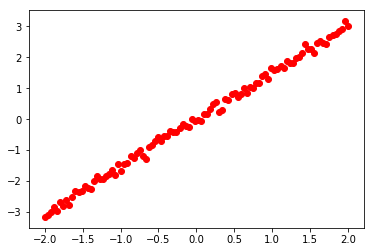

In [19]:
#  可視化資料集
plt.scatter(X_train, y_train, c='red')
plt.show()

計算線性迴歸的時候會有幾個步驟：  
1. 初始化參數(w)與偏差單元(b)
    * 簡單線性迴歸，dimension皆為1
    * [tf.random_normal](https://www.tensorflow.org/api_docs/python/tf/random_normal)
    * [tf.zeros](https://www.tensorflow.org/api_docs/python/tf/zeros)
2. 計算預測數值
    * [tf.multiply](https://www.tensorflow.org/api_docs/python/tf/multiply)
    * [tf.add](https://www.tensorflow.org/api_docs/python/tf/add)
3. 計算成本函數(Cost function)
    * $\frac{1}{m}\sum(y-\hat{y})^2$
    * [tf.reduce_mean](https://www.tensorflow.org/api_docs/python/tf/reduce_mean)
    * [tf.square](https://www.tensorflow.org/api_docs/python/tf/square)
    * [tf.subtract](https://www.tensorflow.org/api_docs/python/tf/subtract)
4. 計算偏導數
    * [GradientDescent](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer)
5. 更新參數與偏差單元
6. 重覆2-5，直到結束iterator

W: [1.4024369]
b: [-0.00725534]
cost: 0.031675637


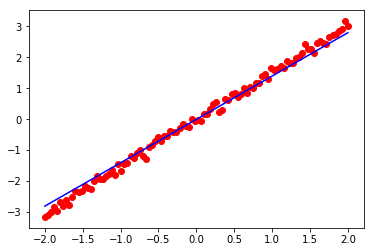

In [38]:
#  建置模型

#  輸入與實際輸出
X = tf.placeholder('float')
y = tf.placeholder('float')

#  參數
W = tf.Variable(tf.random_normal([1]), name='W')
b = tf.Variable(tf.zeros([1]), name='b')

#  預測輸出
y_hat = tf.add(tf.multiply(W, X), b)

#  計算成本函數
cost = tf.reduce_mean(tf.square(tf.subtract(y, y_hat)))

#  計算偏導數，tensorflow在透過設置最佳化方式之後會自動幫忙計算
#  裡面需給予超參數『learning_rate(學習效率)』以及最佳化的目標是最小化成本函數
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)


#  Variable init
init = tf.global_variables_initializer()
#  設定迭代次數
epochs = 100

with tf.Session() as sess:
    #  執行初始化
    sess.run(init)  
    #  迭代次數
    for epoch in range(epochs):
        #  我們已經規劃好graph，所以執行optimizer之後就可以交給tensorflow了
        sess.run(optimizer, feed_dict={X:X_train, y:y_train})
    
    print('W:', sess.run(W))
    print('b:', sess.run(b))
    print('cost:', sess.run(cost, feed_dict={X:X_train, y:y_train}))
    
    #  將結果列印
    plt.scatter(X_train, y_train, c='red')
    plt.plot(X_train, X_train * W.eval() + b.eval(), c='blue')
    plt.show()

### 小結
透過簡單線性迴歸的範例我們理解幾點：  
* `tf.placehold`與`tf.Variable`的操作
    * 注意到`tf.global_variables_initializer`只會針對執行之前的`tf.Variable`有效果，在之後宣告的是沒有效果的(參考下面錯誤案例)。  
    * 可以利用eval()來取得值
        * 必需在context內才有辦法使用
        * [參考](https://blog.csdn.net/chengshuhao1991/article/details/78554743)
* tensor的加減乘除操作
* 透過`tf.train`內的function設置最佳化方式
* 偏導數的部份由框架(tensorflow)直接處理，不需特別設置

當然上面的線性迴歸還有很大的調整空間，不過我們的目標是簡單了解tensorflow，所以不做太複雜的設置，最重要的是，我們規劃了『graph』，定義了我們希望做的事情『`optimizer`：利用梯度下降(GradientDescent)來最小化`cost`』，然後在`tf.Session`內做迭次的執行，清楚的區隔了graph(規劃)與Session(執行)。

In [44]:
#  錯誤案例
a = tf.Variable(1, name='a')
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    b = tf.Variable(2, name='b')
    print(sess.run(a))
    print(sess.run(b))

1


FailedPreconditionError: Attempting to use uninitialized value b_14
	 [[Node: _retval_b_14_0_0 = _Retval[T=DT_INT32, index=0, _device="/job:localhost/replica:0/task:0/device:CPU:0"](b_14)]]

## TensorBoard
透過tensorboard可以觀察整個graph的流程，主要利用`tf.summary.merge_all()`與`tensor_log = tf.summary.FileWriter('log/linear', sess.graph)`來產生log檔。  
接下來開啟`cmd`，並將路徑調整至`log`，再執行指令，下面範例說明：  

<img src="images/tensorboard01.jpg">
指令如下：
```shell
c:users\marty.chen\log>tensorboard --logdir=linear
```
接著開啟chrome，依指示輸入網址與port就可以連接到tensorboard
<img src="images/tensorboard02.jpg" style="width:600px;height:300px;">

註：FileWriter指定資料夾路徑，依個人需求設置即可。

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
#  以上面的線性模型為例
X_train = np.linspace(-2, 2, 100)
y_train = X_train * 1.5 + np.random.randn(100)*0.1

#  輸入與實際輸出
X = tf.placeholder('float')
y = tf.placeholder('float')

#  參數
W = tf.Variable(tf.random_normal([1]), name='W')
b = tf.Variable(tf.zeros([1]), name='b')

#  預測輸出
y_hat = tf.add(tf.multiply(W, X), b)

#  計算成本函數
cost = tf.reduce_mean(tf.square(tf.subtract(y, y_hat)))

#  計算偏導數，tensorflow在透過設置最佳化方式之後會自動幫忙計算
#  裡面需給予超參數『learning_rate(學習效率)』以及最佳化的目標是最小化成本函數
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)


#  Variable init
init = tf.global_variables_initializer()
#  設定迭代次數
epochs = 100

with tf.Session() as sess:
    #  執行初始化
    sess.run(init)  
    #  迭代次數
    for epoch in range(epochs):
        #  我們已經規劃好graph，所以執行optimizer之後就可以交給tensorflow了
        sess.run(optimizer, feed_dict={X:X_train, y:y_train})
    
    print('W:', sess.run(W))
    print('b:', sess.run(b))
    print('cost:', sess.run(cost, feed_dict={X:X_train, y:y_train}))
    

tf.summary.merge_all()
tensor_log = tf.summary.FileWriter('log/linear', sess.graph)

W: [1.377732]
b: [-0.009644]
cost: 0.029062994


## 總結
透過TensorBoard可以有效的幫助我們理解模型的架構，也注意到`name`的設置完善影響到我們透過tensorboard觀察的閱讀性，這只是一個初步的理解，所以很簡單，後續我們用手寫辨識來做範例，建置一個深度神經網路。

## 學習資源
官網(https://www.tensorflow.org/)  
tensorflow中文社區(http://www.tensorfly.cn/)  
極客學院官方文件中文版(https://github.com/jikexueyuanwiki/tensorflow-zh)  
掘金翻譯計劃(https://github.com/xitu/tensorflow-docs)  
掘金文檔(https://tensorflow.juejin.im/get_started/)  
Google Machine Learning Crash Course(https://developers.google.com/machine-learning/crash-course/ml-intro)  